# Text Classification 

In [125]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

Data source : https://www.kaggle.com/datasets/timilsinabimal/newsarticlecategories

In [126]:
df = pd.read_csv('./data/news-article-categories.csv')
df.head()

,category,title,body
0,ARTS & CULTURE,Modeling Agencies Enabled Sexual Predators For...,"In October 2017, Carolyn Kramer received a dis..."
1,ARTS & CULTURE,Actor Jeff Hiller Talks “Bright Colors And Bol...,This week I talked with actor Jeff Hiller abou...
2,ARTS & CULTURE,New Yorker Cover Puts Trump 'In The Hole' Afte...,The New Yorker is taking on President Donald T...
3,ARTS & CULTURE,Man Surprises Girlfriend By Drawing Them In Di...,"Kellen Hickey, a 26-year-old who lives in Huds..."
4,ARTS & CULTURE,This Artist Gives Renaissance-Style Sculptures...,There’s something about combining the traditio...


In [127]:
df['category'].unique(), df['category'].nunique()

(array(['ARTS & CULTURE', 'BUSINESS', 'COMEDY', 'CRIME', 'EDUCATION',
        'ENTERTAINMENT', 'ENVIRONMENT', 'MEDIA', 'POLITICS', 'RELIGION',
        'SCIENCE', 'SPORTS', 'TECH', 'WOMEN'], dtype=object),
 14)

<Axes: xlabel='category'>

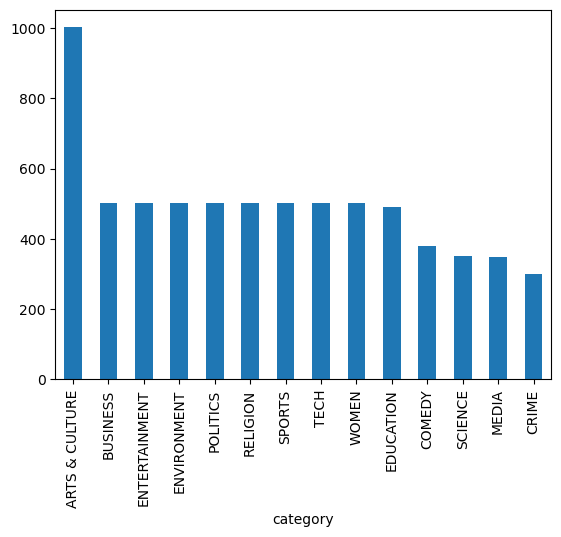

In [128]:
df['category'].value_counts().plot(kind='bar')

## Generative Naive Bayes 

In [129]:
cats = df['category'].unique().tolist()
cats

['ARTS & CULTURE',
 'BUSINESS',
 'COMEDY',
 'CRIME',
 'EDUCATION',
 'ENTERTAINMENT',
 'ENVIRONMENT',
 'MEDIA',
 'POLITICS',
 'RELIGION',
 'SCIENCE',
 'SPORTS',
 'TECH',
 'WOMEN']

In [130]:
text = df['title'].astype(str).str.cat(sep=' ')
print(text[:1000])

Modeling Agencies Enabled Sexual Predators For Years, Former Agent Says Actor Jeff Hiller Talks “Bright Colors And Bold Patterns” and More (AUDIO) New Yorker Cover Puts Trump 'In The Hole' After 'Racist' Comment Man Surprises Girlfriend By Drawing Them In Different Animation Styles This Artist Gives Renaissance-Style Sculptures A Goofy Modern Twist This Dutch 23-Year-Old Epitomizes The Future Of American Filmmaking Broadway Actor Ben Vereen Accused Of Sexual Assault In 2015 'Hair' Production Sculptures From This International Ice And Snow Festival Are Mind-Boggling The Met Museum Is Changing Its Pay-As-You-Wish Admission Policy Duncan Jones Finds A Literary Way To Remember His Father, David Bowie Mystery Novelist Sue Grafton Dead At 77 'Dick Van Dyke' Cast Member Rose Marie Dead At 94 The Best Comments From Milo Yiannopoulos' Editor On His Spiked Manuscript Women-Only Art Shows Stood Out In 2017. Let's Leave Them There. 60 Books We Can't Wait To Read In 2018 A Very Vintage Holiday: Pho

In [131]:
import re
from nltk.corpus import stopwords

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'[^A-Za-z0-9\s]+', '', text)
    text = [ w.strip() for w in text.split() if w not in stopwords.words('english') and len(w) > 1]
    text = ' '.join(text)
    return text

text = clean_text(text)
print(text[:1000])

modeling agencies enabled sexual predators years former agent says actor jeff hiller talks bright colors bold patterns audio new yorker cover puts trump hole racist comment man surprises girlfriend drawing different animation styles artist gives renaissancestyle sculptures goofy modern twist dutch 23yearold epitomizes future american filmmaking broadway actor ben vereen accused sexual assault 2015 hair production sculptures international ice snow festival mindboggling met museum changing payasyouwish admission policy duncan jones finds literary way remember father david bowie mystery novelist sue grafton dead 77 dick van dyke cast member rose marie dead 94 best comments milo yiannopoulos editor spiked manuscript womenonly art shows stood 2017 lets leave 60 books cant wait read 2018 vintage holiday photos recall christmas past call holiday game yankee swap white elephant dirty santa even taylor swift loves broadways shoshana bean cynthia erivo covering song cards humanity tackles wealth

<Figure size 1000x1000 with 0 Axes>

(-0.5, 799.5, 399.5, -0.5)

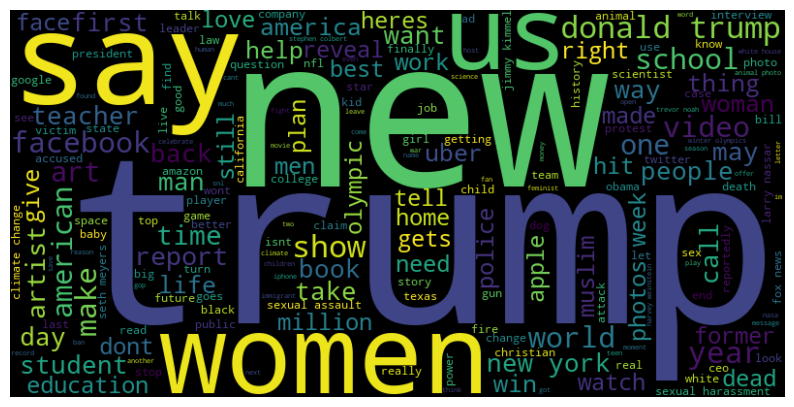

In [132]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400).generate(text)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [133]:
words = text.split()
len(words) , len(set(words))

(49648, 12616)

In [134]:
from collections import Counter
word_freq = Counter(words)
word_freq.most_common(10)

[('trump', 453),
 ('new', 363),
 ('says', 199),
 ('women', 167),
 ('us', 165),
 ('donald', 145),
 ('sexual', 143),
 ('trumps', 138),
 ('school', 138),
 ('first', 132)]

In [135]:
word_dict = dict(word_freq)
len(word_dict)

12616

In [136]:
word_dict = np.zeros((len(cats), len(set(words))))
word_dict.shape

(14, 12616)

In [137]:
cats_text = {}
for cat in cats:
    text = df[df['category'] == cat]['title'].astype(str).str.cat(sep=' ')
    text = clean_text(text)
    cats_text[cat] = text

for i, cat in enumerate(cats):
    word_c = cats_text[cat].split()
    word_freq = Counter(word_c)
    for j, word in enumerate(set(word_c)):
        word_dict[i, j] = word_freq[word]


word_dict[:5, :5]

array([[17.,  1.,  1.,  1.,  1.],
       [ 6.,  5.,  1.,  1.,  3.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  2.,  2.,  1.],
       [ 1.,  1.,  1.,  2.,  1.]])

In [138]:
word_dict.shape
cats_text[cats[1]][:1000]

(14, 12616)

'us launches auto import probe china vows defend interests starbucks says anyone sit cafes even without buying anything seattle passes controversial new tax citys biggest companies combat housing crisis uber ends forced arbitration individual cases sexual assault harassment uber silences women sexual assaults amazon holding seattle hostage bank america appears flip firearm promise loan remington exvolkswagen ceo charged us emissions cheating scandal women describe rampant groping sexual harassment verizoncontracted warehouse tmobile agrees acquire sprint 26 billion sec made case divesting fossil fuel companies much stronger dicks sporting goods destroying unsold assaultstyle rifles facebook didnt seem care sexually harassed decided write los angeles bitter tensions house homeless rile communities libertarian political movement dead apple cofounder steve wozniak ditches facebook data scandal twitter suspended 12 million accounts terrorist content trump proposes slapping 100 billion new 

## 1.4.2 Generate random text

In [149]:
class NaiveBayesTextGenerator:
    def __init__(self, cats, word_dict,words):
        self.cats = cats
        self.word_dict = word_dict
        self.words = words
    
    def generate_text(self, category, num_words=100):
        # catrgorical 
        cat_choose = np.random.choice(self.cats, p=[1/len(self.cats) for _ in range(len(self.cats))])
        print(f'category chosen: {cat_choose}')
        cat_choose = self.cats.index(cat_choose)
        word_probs = self.word_dict[cat_choose] / self.word_dict[cat_choose].sum()
        # multinomial 
        words_gen = np.random.choice(list(set(self.words)), size=num_words, p=word_probs)
        return ' '.join(words_gen)

In [152]:
nb = NaiveBayesTextGenerator(cats, word_dict,words)
nb.generate_text(cats[0], 10) 
nb.generate_text(cats[0], 10) 
nb.generate_text(cats[0], 10) 

category chosen: COMEDY


'emoji dealer islander oil lebanon orson alignment antischutz sheryl playboy'

category chosen: COMEDY


'montreals reflection two tabernacle beings housekeepers blob relations bought ming'

category chosen: SCIENCE


'significantly ashbery debbie wears intersections delusional indecent 13year confucius kid'

## 1.4.4 Inference 